In [2]:
# Importation de librairies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Importation du fichier excel

df = pd.ExcelFile("Unicorn.xlsx") # Load spreadsheet
df = df.parse('Unicorns', skiprows=2)

In [4]:
# Keep needed columns

df = df[['Company', 'Valuation ($B) ', 'Date Added', 'Country',
       'Category', 'Select Investors']]
df.columns

Index(['Company', 'Valuation ($B) ', 'Date Added', 'Country', 'Category',
       'Select Investors'],
      dtype='object')

In [5]:
df.head(5)

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,95.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,45.6,2011-12-12,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Epic Games,42.0,2018-10-26,United States,Other,"Tencent Holdings, KKR, Smash Ventures"


In [115]:
len(df)

1000

In [6]:
df.dtypes

Company                     object
Valuation ($B)             float64
Date Added          datetime64[ns]
Country                     object
Category                    object
Select Investors            object
dtype: object

In [7]:
df.rename(columns={"Valuation ($B) ": "Valuation", "Date Added": "Date_Added"}, inplace=True)

In [8]:
df.head(5)

,Company,Valuation,Date_Added,Country,Category,Select Investors
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,95.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,45.6,2011-12-12,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Epic Games,42.0,2018-10-26,United States,Other,"Tencent Holdings, KKR, Smash Ventures"


In [9]:
df.describe()

,Valuation
count,1000.000000
mean,3.307270
std,7.405112
min,1.000000
25%,1.070000
50%,1.600000
75%,3.100000
max,140.000000


# Per month

In [10]:
df['Date_Added']= pd.to_datetime(df.Date_Added)

In [11]:
df.dtypes

Company                     object
Valuation                  float64
Date_Added          datetime64[ns]
Country                     object
Category                    object
Select Investors            object
dtype: object

In [12]:
df['year'] = pd.DatetimeIndex(df.Date_Added).year

In [13]:
df['month'] = pd.DatetimeIndex(df.Date_Added).month

df['day'] = pd.DatetimeIndex(df.Date_Added).day

df['week_day'] = pd.DatetimeIndex(df.Date_Added).weekday


In [14]:
df

,Company,Valuation,Date_Added,Country,Category,Select Investors,year,month,day,week_day
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4,7,4
1,SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12,1,5
2,Stripe,95.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1,23,3
3,Klarna,45.6,2011-12-12,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,12,12,0
4,Epic Games,42.0,2018-10-26,United States,Other,"Tencent Holdings, KKR, Smash Ventures",2018,10,26,4
...,...,...,...,...,...,...,...,...,...,...
995,Fever Labs,1.0,2022-01-26,United States,Internet software & services,"Accel, 14W, GS Growth",2022,1,26,2
996,Minio,1.0,2022-01-26,United States,Data management & analytics,"General Catalyst, Nexus Venture Partners, Dell...",2022,1,26,2
997,Esusu,1.0,2022-01-27,United States,Fintech,"Next Play Ventures, Zeal Capital Partners, Sof...",2022,1,27,3
998,Betterfly,1.0,2022-02-01,Chile,Artificial intelligence,"QED Investors, DST Global, Endeavor",2022,2,1,1


In [27]:
import datetime as dt

In [18]:
print(dir(dt))

['MAXYEAR', 'MINYEAR', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']


#### Date formating 

example:
%A weekday : full name (monday )
%a weekday : abbreviated (mon)
%B : month str (june )
%d : day of month
%Y : (2018 )
%y : (2018



In [80]:
df['year'].unique()

array([2017, 2012, 2014, 2011, 2018, 2019, 2021, 2016, 2022, 2015, 2020,
       2013, 2007])

In [30]:
df.dtypes

Company                     object
Valuation                  float64
Date_Added          datetime64[ns]
Country                     object
Category                    object
Select Investors            object
year                datetime64[ns]
month                      float64
day                          int64
week_day                     int64
dtype: object

In [28]:
df['month'] = pd.to_datetime(df['month'], errors='coerce')
df['month'] = df['month'].dt.strftime('%B')


In [15]:
df['month'].unique()

array([ 4, 12,  1, 10,  5,  2,  7,  3,  6,  8, 11,  9])

In [55]:
df['numba'] = len(df)

In [58]:
df.set_index('Company')

,Valuation,Date_Added,Country,Category,Select Investors,year,month,day,week_day,numba
Company,,,,,,,,,,
Bytedance,140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4,7,4,1000
SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12,1,5,1000
Stripe,95.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1,23,3,1000
Klarna,45.6,2011-12-12,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,12,12,0,1000
Epic Games,42.0,2018-10-26,United States,Other,"Tencent Holdings, KKR, Smash Ventures",2018,10,26,4,1000
...,...,...,...,...,...,...,...,...,...,...
Fever Labs,1.0,2022-01-26,United States,Internet software & services,"Accel, 14W, GS Growth",2022,1,26,2,1000
Minio,1.0,2022-01-26,United States,Data management & analytics,"General Catalyst, Nexus Venture Partners, Dell...",2022,1,26,2,1000
Esusu,1.0,2022-01-27,United States,Fintech,"Next Play Ventures, Zeal Capital Partners, Sof...",2022,1,27,3,1000


In [85]:
df['New Column'] = 'Constant Value'
df['New Column'] = 1

# 2022

In [87]:
A.month.unique()


array([1, 2])

Janvier

In [90]:
first = df['year'] == 2022
A = df[first]
A.month.unique()
A.month.unique()


Z = A[A['month'] == 1]
M = Z[['New Column', 'month']]
M.sum()

New Column    42
month         42
dtype: int64

In [95]:
A.describe()

,Valuation,year,month,day,week_day,numba,New Column
count,47.000000,47.0,47.000000,47.000000,47.000000,47.0,47.0
mean,1.907660,2022.0,1.106383,15.510638,1.659574,1000.0,1.0
std,2.459638,0.0,0.311661,9.105355,1.089008,0.0,0.0
min,1.000000,2022.0,1.000000,1.000000,0.000000,1000.0,1.0
25%,1.150000,2022.0,1.000000,10.500000,1.000000,1000.0,1.0
50%,1.300000,2022.0,1.000000,13.000000,2.000000,1000.0,1.0
75%,1.610000,2022.0,1.000000,25.000000,2.000000,1000.0,1.0
max,17.500000,2022.0,2.000000,31.000000,4.000000,1000.0,1.0


Fevrier

In [98]:
K = A[A['month'] == 2]
N = K[['Company', 'month']]
N.sum()

Company    ProductboardWayflyerLoadsmartBetterflyDune Ana...
month                                                     10
dtype: object

# 2021

In [99]:
second = df['year'] == 2021
B =df[second]

In [103]:
len(B)/12

42.583333333333336

2020

In [104]:
thrid = df['year'] == 2020
C = df[thrid]
C.month.unique()

len(C)/12

8.916666666666666

2019

In [105]:
fourth = df['year'] == 2019
D = df[fourth]
D.month.unique()

len(D)/12

8.916666666666666

2018

In [106]:
fifth = df['year'] == 2018
F = df[fifth]
F.month.unique()

len(F)/12

8.583333333333334

2017

In [114]:
fifth = df['year'] == 2007
F = df[fifth]
F.month.unique()

len(F)/12

0.08333333333333333

## Countires

In [8]:
df['Company'].count()

1000

In [9]:
# Number ok countries
NC =df['Country'].str.count(',').add(1).groupby(df.Country).sum()
NC = NC.sort_values(ascending=False)
Gcountries = pd.DataFrame(data=NC, index=None)
Gcountries.head(10)

,Country
Country,
United States,510
China,167
India,59
United Kingdom,39
Germany,25
France,24
Israel,24
Canada,17
Brazil,15


Text(0, 0.5, 'Number of projects')

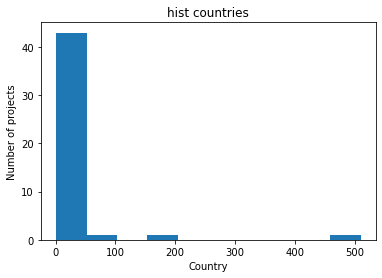

In [10]:
fig, ax = plt.subplots()
ax.hist(NC)
ax.set_title('hist countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of projects')


Text(0.5, 0.98, 'Distributioin des unicornes \n2008-2022')

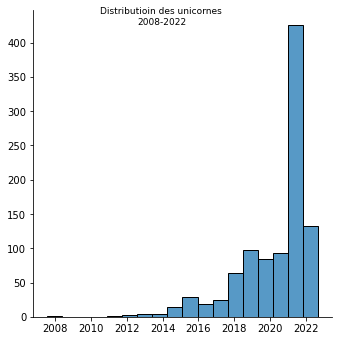

In [11]:
ax = sns.displot(df, x="Date_Added",binwidth=307)
ax.set(xlabel='', ylabel='')
ax.fig.suptitle("Distributioin des unicornes \n2008-2022",fontsize=9)

- Variation de la valuation par rapport a la date
- distribution de la valuation

In [12]:
ts = df[['Date_Added', 'Valuation']]

Text(0, 0.5, 'B $')

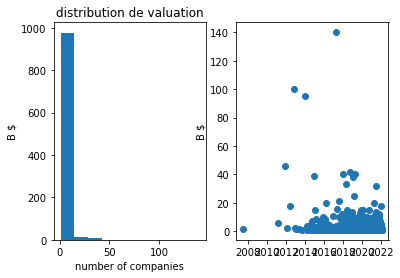

In [13]:
fig, ax = plt.subplots(1,2)
ax[0].hist(ts['Valuation'])
ax[0].set_title('distribution de valuation')
ax[0].set_xlabel('number of companies')
ax[0].set_ylabel('B $')

ax[1].scatter(ts['Date_Added'],ts['Valuation'])
ax[1].set_ylabel('B $')


In [14]:
df.columns

Index(['Company', 'Valuation', 'Date_Added', 'Country', 'Category',
       'Select Investors'],
      dtype='object')

In [15]:
df.dtypes

Company                     object
Valuation                  float64
Date_Added          datetime64[ns]
Country                     object
Category                    object
Select Investors            object
dtype: object

# Categories

In [14]:
# Number ok categories
cat =df['Country'].str.count(',').add(1).groupby(df.Category).sum()
cat = cat.sort_values(ascending=False)
categories = pd.DataFrame(data=cat, index=None)
categories.head(10)

,Country
Category,
Fintech,206
Internet software & services,184
E-commerce & direct-to-consumer,108
Artificial intelligence,72
Health,67
Other,55
"Supply chain, logistics, & delivery",53
Cybersecurity,43
Data management & analytics,41


# Companies by levée de fond

In [17]:
LF = df[['Company', 'Valuation']]
LF.head(5)


,Company,Valuation
0,Bytedance,140.0
1,SpaceX,100.3
2,Stripe,95.0
3,Klarna,45.6
4,Epic Games,42.0


In [18]:
df['Select Investors'] = df['Select Investors'].astype('str')

# For loop to get all the investors

In [ ]:
investors = []

for i in range(len(df)):
    for j in range(len(df.loc[i, 'Select Investors'].split(','))):
        investors.append(df.loc[i
my_dict = {}
for i in range(len(investors)):
    my_dict[investors[i]] = 0, 'Select Investors'].split(',')[j])

output = []
for x in investors:
    if x not in output:
        output.append(x)

investors = output

In [20]:
type(investors)

list

In [21]:
investors[i]

' CMC Capital Partners'

In [22]:

my_dict = {}
for i in range(len(investors)):
    my_dict[investors[i]] = 0

In [23]:
for i in range(len(df)):
    for j in range(len(df.loc[i, 'Select Investors'].split(','))):
        for key in my_dict:
            if df.loc[i, 'Select Investors'].split(',')[j] == key:
                my_dict[key] += 1

In [24]:
my_dict

{'Sequoia Capital China': 29,
 ' SIG Asia Investments': 3,
 ' Sina Weibo': 2,
 ' Softbank Group': 8,
 'Founders Fund': 4,
 ' Draper Fisher Jurvetson': 1,
 ' Rothenberg Ventures': 1,
 'Khosla Ventures': 11,
 ' LowercaseCapital': 1,
 ' capitalG': 6,
 'Institutional Venture Partners': 3,
 ' Sequoia Capital': 27,
 ' General Atlantic': 18,
 'Tencent Holdings': 11,
 ' KKR': 3,
 ' Smash Ventures': 1,
 ' Blackbird Ventures': 2,
 ' Matrix Partners': 4,
 'Tiger Global Management': 14,
 ' Insight Partners': 21,
 ' DST Global': 15,
 ' Kleiner Perkins Caufield & Byers': 14,
 ' Collaborative Fund': 1,
 'Andreessen Horowitz': 25,
 ' New Enterprise Associates': 7,
 ' Battery Ventures': 13,
 'index Ventures': 1,
 ' Ribbit Capital': 7,
 'Sequoia Capital': 16,
 ' Thoma Bravo': 3,
 ' Softbank': 3,
 'Forerunner Ventures': 2,
 ' Crosslink Capital': 2,
 ' Homebrew': 2,
 ' Lightspeed India Partners': 2,
 ' Sequoia Capital India': 15,
 'GGV Capital': 7,
 ' ZhenFund': 7,
 ' Tencent': 4,
 'Hillhouse Capital Mana

In [25]:
data_items = my_dict.items()
data_list = list(data_items)
#data_list
df_2 = pd. DataFrame(data_list) 
print(df_2)

                                0   1
0           Sequoia Capital China  29
1            SIG Asia Investments   3
2                      Sina Weibo   2
3                  Softbank Group   8
4                   Founders Fund   4
...                           ...  ..
1447              Endiya Partners   1
1448           Next Play Ventures   1
1449        Zeal Capital Partners   1
1450            Multicoin Capital   1
1451   Dragonfly Capital Partners   1

[1452 rows x 2 columns]


In [26]:
df_2.head()

,0,1
0,Sequoia Capital China,29
1,SIG Asia Investments,3
2,Sina Weibo,2
3,Softbank Group,8
4,Founders Fund,4


In [27]:
df_2.rename(columns={0: "Investors", 1: "count"}, inplace=True)

In [28]:
inv = df_2.sort_values(by='count', ascending=False)

In [29]:
inv.head(10)

,Investors,count
163,Tiger Global Management,33
122,Accel,30
0,Sequoia Capital China,29
11,Sequoia Capital,27
45,Accel,27
23,Andreessen Horowitz,25
135,General Catalyst,23
19,Insight Partners,21
203,Insight Partners,20
137,SoftBank Group,19


In [30]:
inv.describe()

,count
count,1452.000000
mean,1.951102
std,2.922798
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,33.000000


In [31]:
df_2.iloc[163,:]

Investors     Tiger Global Management
count                              33
Name: 163, dtype: object

In [32]:
"""df_2.to_excel('investors.xlsx')"""

"df_2.to_excel('investors.xlsx')"

In [33]:
'''inv.to_excel('ordered_investors.xlsx')'''

"inv.to_excel('ordered_investors.xlsx')"

In [34]:
"""df.to_excel('df.xlsx')"""

"df.to_excel('df.xlsx')"

In [35]:
df.head()

,Company,Valuation,Date_Added,Country,Category,Select Investors
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,95.0,2014-01-23,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,45.6,2011-12-12,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Epic Games,42.0,2018-10-26,United States,Other,"Tencent Holdings, KKR, Smash Ventures"


In [36]:
contain_values = df[df['Country'].str.contains('France')]
contain_values

,Company,Valuation,Date_Added,Country,Category,Select Investors
108,Back Market,5.70,2021-05-18,France,E-commerce & direct-to-consumer,"Aglae Ventures, Eurazeo, Daphni"
137,Qonto,5.00,2022-01-11,France,Fintech,"Alven Capital, Valar Ventures, Tencent Holdings"
156,Sorare,4.30,2021-09-21,France,E-commerce & direct-to-consumer,"Benchmark, Accel, SoftBank Group"
208,Mirakl,3.50,2020-09-22,France,E-commerce & direct-to-consumer,"Elaia Partners, 83North, Felix Capital"
297,ContentSquare,2.80,2021-05-25,France,Internet software & services,"Highland Europe, Eurazeo, Canaan Partners"
316,ManoMano,2.60,2021-07-05,France,E-commerce & direct-to-consumer,"General Atlantic, Piton Capital, Partech Partners"
345,Voodoo,2.31,2020-08-17,France,Other,"Tencent Holdings, Goldman Sachs"
353,Ankorstore,2.26,2022-01-10,France,E-commerce & direct-to-consumer,"Global Founders Capital, Aglae Ventures, Alven..."
383,BlaBlaCar,2.00,2015-09-16,France,Auto & transportation,"Accel Partners, Index Ventures, Insight Ventur..."
445,Exotec,2.00,2022-01-17,France,Hardware,"Breega Capital, Iris Capital, 360 Capital Part..."


# Investors in USA

In [37]:
Usa = df[df['Country'].str.contains('United States')]
Usa.sort_values(by='Date_Added', ascending=False)

,Company,Valuation,Date_Added,Country,Category,Select Investors
482,Productboard,1.7,2022-02-02,United States,Internet software & services,"Index Ventures, Kleiner Perkins Caufield & Bye..."
635,Loadsmart,1.3,2022-02-01,United States,"Supply chain, logistics, & delivery","Chromo Invest, Maersk Growth, BlackRock"
694,Phantom,1.2,2022-01-31,United States,Fintech,"Paradigm, Andreessen Horowitz, Jump Capital"
563,Athelas,1.5,2022-01-31,United States,Health,"Sequoia Capital, General Catalyst, Human Capital"
997,Esusu,1.0,2022-01-27,United States,Fintech,"Next Play Ventures, Zeal Capital Partners, Sof..."
...,...,...,...,...,...,...
515,Mu Sigma,1.5,2013-02-07,United States,Data management & analytics,"Sequoia Capital, General Atlantic"
380,Avant,2.0,2012-12-17,United States,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital"
1,SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
15,Fanatics,18.0,2012-06-06,United States,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H..."


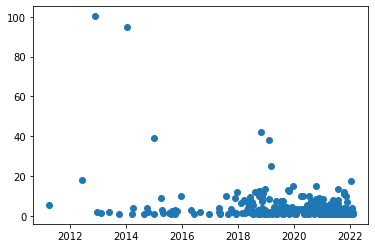

In [38]:
plt.scatter('Date_Added', 'Valuation', data=Usa)

In [39]:
v = contain_values['C'].value_counts()

Text(0, 0.5, 'Number of investments')

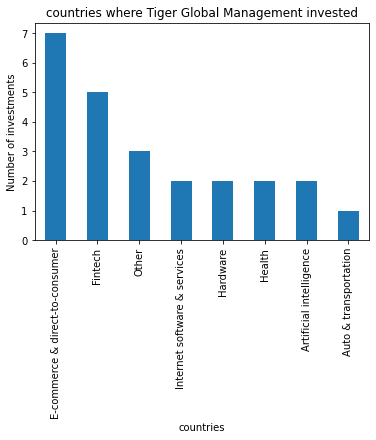

In [40]:
v.plot(kind='bar')
plt.title('countries where Tiger Global Management invested')
plt.xlabel('countries')
plt.ylabel('Number of investments')

Text(0, 0.5, 'Number of investments')

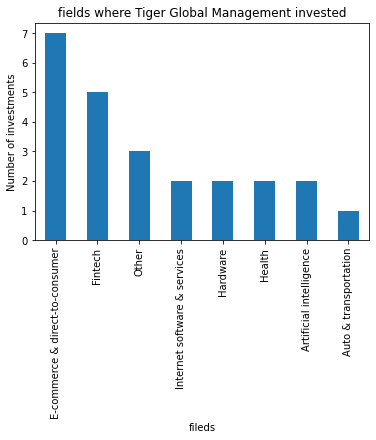

In [41]:
v.plot(kind='bar')
plt.title('fields where Tiger Global Management invested')
plt.xlabel('fileds')
plt.ylabel('Number of investments')

In [42]:
df['Country'].value_counts()

United States           510
China                   167
India                    59
United Kingdom           39
Germany                  25
France                   24
Israel                   24
Canada                   17
Brazil                   15
Singapore                12
South Korea              11
Hong Kong                 7
Sweden                    6
Australia                 6
Japan                     6
Mexico                    6
Ireland                   5
Netherlands               5
Indonesia                 5
Switzerland               4
Spain                     4
Norway                    4
United Arab Emirates      3
Belgium                   3
Austria                   2
Turkey                    2
Estonia                   2
Vietnam                   2
Denmark                   2
Thailand                  2
Chile                     2
Finland                   2
Philippines               2
South Africa              2
Colombia                  2
Bermuda             

### Top 10 catégories pour les licornes aux USA

In [43]:
Usa = df[df['Country'].str.contains('United States')]
Usa.sort_values(by='Date_Added', ascending=False)
Usa.head(2)

,Company,Valuation,Date_Added,Country,Category,Select Investors
482,Productboard,1.7,2022-02-02,United States,Internet software & services,"Index Ventures, Kleiner Perkins Caufield & Bye..."
635,Loadsmart,1.3,2022-02-01,United States,"Supply chain, logistics, & delivery","Chromo Invest, Maersk Growth, BlackRock"
694,Phantom,1.2,2022-01-31,United States,Fintech,"Paradigm, Andreessen Horowitz, Jump Capital"
563,Athelas,1.5,2022-01-31,United States,Health,"Sequoia Capital, General Catalyst, Human Capital"
997,Esusu,1.0,2022-01-27,United States,Fintech,"Next Play Ventures, Zeal Capital Partners, Sof..."
...,...,...,...,...,...,...
515,Mu Sigma,1.5,2013-02-07,United States,Data management & analytics,"Sequoia Capital, General Atlantic"
380,Avant,2.0,2012-12-17,United States,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital"
1,SpaceX,100.3,2012-12-01,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
15,Fanatics,18.0,2012-06-06,United States,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H..."


In [44]:
Usa['Category'].str.count('').sum()

9903

In [61]:
USA_categories = Usa['Category'].value_counts()
USA_categories

Internet software & services           135
Fintech                                105
Health                                  48
Artificial intelligence                 38
Cybersecurity                           31
Data management & analytics             30
E-commerce & direct-to-consumer         29
Other                                   27
Supply chain, logistics, & delivery     20
Mobile & telecommunications             12
Consumer & retail                       11
Hardware                                 9
Edtech                                   7
Auto & transportation                    4
Artificial Intelligence                  2
Finttech                                 1
Travel                                   1
Name: Category, dtype: int64

In [100]:
Usa_Cat = pd.DataFrame(data=USA_categories, index=None)
Usa_Cat

,Category
Internet software & services,135
Fintech,105
Health,48
Artificial intelligence,38
Cybersecurity,31
Data management & analytics,30
E-commerce & direct-to-consumer,29
Other,27
"Supply chain, logistics, & delivery",20
Mobile & telecommunications,12


## Top 10 investisseurs pour les licornes aux USA

In [ ]:
investor = []

for i in range(len(df)):
    for j in range(len(df.loc[i, 'Select Investors'].split(','))):
        investor.append(df.loc[i, 'Select Investors'].split(',')[j])

output = []
for x in investor:
    if x not in output:
        output.append(x)

investor = output

In [29]:
investors_usa

NameError: name 'investors_usa' is not defined

### Distribution

(0.0, 20.0)

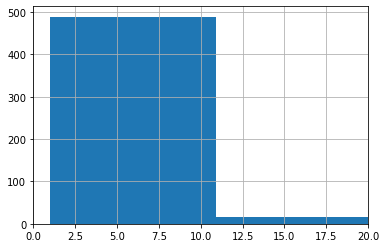

In [95]:
Usa['Valuation'].hist()
plt.xlim(0,20)

# China

# India 

# United kingdom

# Germany 

# France